In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Hyperparameters
latent_dim = 128  # Increased latent dimension for more complex feature generation
img_size = 28 * 28
batch_size = 512  # Increased batch size for better gradient estimation
learning_rate = 0.0001  # Reduced learning rate for more stable training
num_epochs = 200  # Increased number of epochs for more extensive training

# check if MPS or CUDA is available
device = torch.device("mps") if torch.backends.mps.is_available() else torch.device("cuda") if torch.cuda.is_available() else "cpu"
print("Using device: ", device)

Using device:  mps


In [3]:
# Transforms
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize([0.5], [0.5])])

# Load the MNIST dataset
dataset = torchvision.datasets.MNIST(root="./data", train=True, transform=transform, download=True)

# Create a dataloader
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=4, pin_memory=True)


In [4]:
# Generator Model
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 512),  # Increased dimensions
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Linear(1024, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),
            nn.Linear(2048, output_dim),
            nn.Tanh()
        )

    def forward(self, x):
        return self.model(x)

In [5]:
# Discriminator Model
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 2048),  # Increased dimensions
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),  # Added Dropout to prevent overfitting
            nn.Linear(2048, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

In [6]:
# Initialize models
generator = Generator(latent_dim, img_size).to(device)
discriminator = Discriminator(img_size).to(device)

# Loss and Optimizers
criterion = nn.BCELoss()
g_optimizer = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))  # Added betas for more stable Adam
d_optimizer = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))

# Scheduler for dynamic learning rate
g_scheduler = optim.lr_scheduler.StepLR(g_optimizer, step_size=50, gamma=0.5)
d_scheduler = optim.lr_scheduler.StepLR(d_optimizer, step_size=50, gamma=0.5)

# Utility function to denormalize images
def denormalize(img):
    img = img * 0.5 + 0.5
    return img

Epoch [1/200]  D Loss: 1.1642  G Loss: 1.3757


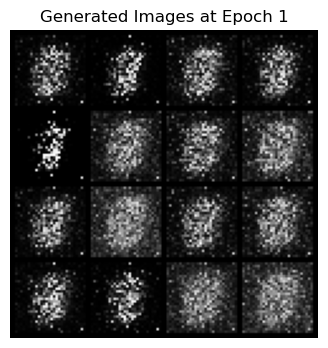

Epoch [2/200]  D Loss: 1.0834  G Loss: 0.7472
Epoch [3/200]  D Loss: 0.8640  G Loss: 1.6266
Epoch [4/200]  D Loss: 1.0859  G Loss: 1.3557
Epoch [5/200]  D Loss: 1.1778  G Loss: 2.3489
Epoch [6/200]  D Loss: 1.3969  G Loss: 1.9926
Epoch [7/200]  D Loss: 1.1383  G Loss: 0.8786
Epoch [8/200]  D Loss: 0.8655  G Loss: 1.3420
Epoch [9/200]  D Loss: 1.1659  G Loss: 2.2469
Epoch [10/200]  D Loss: 1.6767  G Loss: 3.3346
Epoch [11/200]  D Loss: 1.0231  G Loss: 2.2893


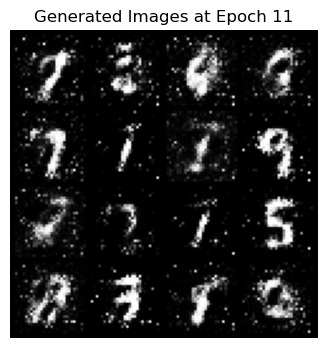

Epoch [12/200]  D Loss: 0.9424  G Loss: 1.1735
Epoch [13/200]  D Loss: 0.9708  G Loss: 1.2160
Epoch [14/200]  D Loss: 1.1118  G Loss: 0.8748
Epoch [15/200]  D Loss: 1.0021  G Loss: 1.3612
Epoch [16/200]  D Loss: 1.1090  G Loss: 0.9127
Epoch [17/200]  D Loss: 0.9411  G Loss: 2.1408
Epoch [18/200]  D Loss: 1.1377  G Loss: 1.0019
Epoch [19/200]  D Loss: 1.1600  G Loss: 0.7811
Epoch [20/200]  D Loss: 1.2367  G Loss: 0.9268
Epoch [21/200]  D Loss: 1.2137  G Loss: 2.1857


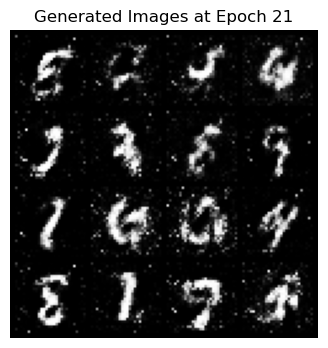

Epoch [22/200]  D Loss: 1.1979  G Loss: 0.9393
Epoch [23/200]  D Loss: 1.1395  G Loss: 1.3841
Epoch [24/200]  D Loss: 1.0818  G Loss: 1.2938
Epoch [25/200]  D Loss: 1.0438  G Loss: 1.0589
Epoch [26/200]  D Loss: 1.1005  G Loss: 0.8728
Epoch [27/200]  D Loss: 1.1542  G Loss: 1.0725
Epoch [28/200]  D Loss: 1.1840  G Loss: 0.9313
Epoch [29/200]  D Loss: 1.1739  G Loss: 1.1654
Epoch [30/200]  D Loss: 1.0968  G Loss: 1.3075
Epoch [31/200]  D Loss: 1.0602  G Loss: 1.3329


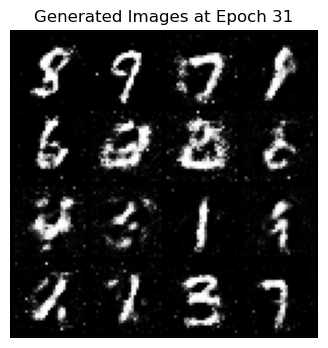

Epoch [32/200]  D Loss: 1.0483  G Loss: 1.3590
Epoch [33/200]  D Loss: 1.3064  G Loss: 1.0593
Epoch [34/200]  D Loss: 1.1578  G Loss: 1.1537
Epoch [35/200]  D Loss: 1.1273  G Loss: 1.1001
Epoch [36/200]  D Loss: 1.1317  G Loss: 1.3242
Epoch [37/200]  D Loss: 1.1528  G Loss: 1.1836
Epoch [38/200]  D Loss: 1.1156  G Loss: 1.2089
Epoch [39/200]  D Loss: 1.1869  G Loss: 0.9899
Epoch [40/200]  D Loss: 1.1889  G Loss: 1.4266
Epoch [41/200]  D Loss: 1.1382  G Loss: 1.0285


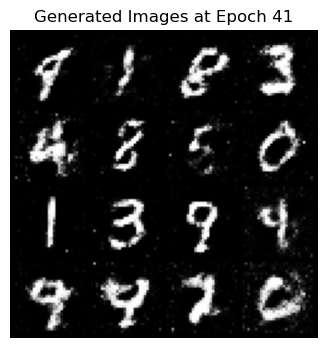

Epoch [42/200]  D Loss: 1.1969  G Loss: 0.9163
Epoch [43/200]  D Loss: 1.3143  G Loss: 0.7923
Epoch [44/200]  D Loss: 1.1203  G Loss: 1.1267
Epoch [45/200]  D Loss: 1.2607  G Loss: 0.8329
Epoch [46/200]  D Loss: 1.2259  G Loss: 0.9812
Epoch [47/200]  D Loss: 1.0732  G Loss: 1.1674
Epoch [48/200]  D Loss: 1.2129  G Loss: 1.0597
Epoch [49/200]  D Loss: 1.1623  G Loss: 0.8715
Epoch [50/200]  D Loss: 1.1557  G Loss: 1.3138
Epoch [51/200]  D Loss: 1.2885  G Loss: 0.9274


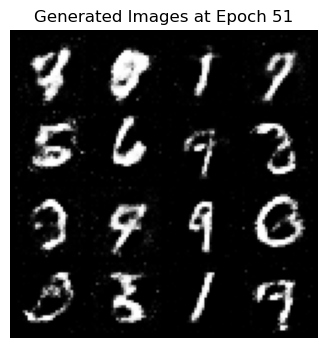

Epoch [52/200]  D Loss: 1.1032  G Loss: 1.1654
Epoch [53/200]  D Loss: 1.1280  G Loss: 1.0377
Epoch [54/200]  D Loss: 1.1971  G Loss: 1.2347
Epoch [55/200]  D Loss: 1.1492  G Loss: 1.1429
Epoch [56/200]  D Loss: 1.1754  G Loss: 0.9402
Epoch [57/200]  D Loss: 1.1871  G Loss: 1.0092
Epoch [58/200]  D Loss: 1.1802  G Loss: 1.4973
Epoch [59/200]  D Loss: 1.1947  G Loss: 1.1701
Epoch [60/200]  D Loss: 1.1892  G Loss: 0.9633
Epoch [61/200]  D Loss: 1.2139  G Loss: 0.8856


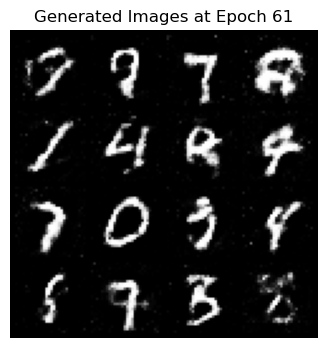

Epoch [62/200]  D Loss: 1.1120  G Loss: 1.2436
Epoch [63/200]  D Loss: 1.1930  G Loss: 1.3407
Epoch [64/200]  D Loss: 1.2926  G Loss: 1.6116
Epoch [65/200]  D Loss: 1.2108  G Loss: 1.1008
Epoch [66/200]  D Loss: 1.2341  G Loss: 1.1272
Epoch [67/200]  D Loss: 1.2278  G Loss: 0.8177
Epoch [68/200]  D Loss: 1.2275  G Loss: 0.8799
Epoch [69/200]  D Loss: 1.2230  G Loss: 0.8995
Epoch [70/200]  D Loss: 1.1803  G Loss: 1.0334
Epoch [71/200]  D Loss: 1.2005  G Loss: 0.8386


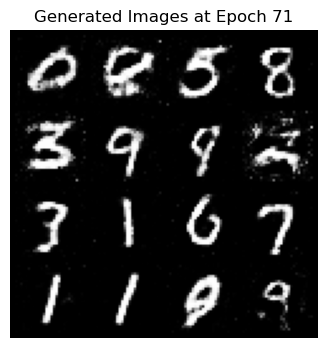

Epoch [72/200]  D Loss: 1.1809  G Loss: 1.0121
Epoch [73/200]  D Loss: 1.2332  G Loss: 0.8543
Epoch [74/200]  D Loss: 1.1518  G Loss: 1.1680
Epoch [75/200]  D Loss: 1.1577  G Loss: 1.2020
Epoch [76/200]  D Loss: 1.3041  G Loss: 1.0468
Epoch [77/200]  D Loss: 1.3084  G Loss: 1.3429
Epoch [78/200]  D Loss: 1.1529  G Loss: 1.5429
Epoch [79/200]  D Loss: 1.1696  G Loss: 1.1559
Epoch [80/200]  D Loss: 1.1667  G Loss: 0.8224
Epoch [81/200]  D Loss: 1.1922  G Loss: 1.1372


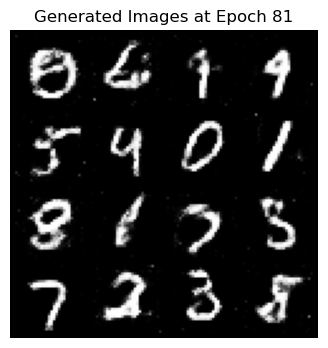

Epoch [82/200]  D Loss: 1.1992  G Loss: 1.0013
Epoch [83/200]  D Loss: 1.2014  G Loss: 1.1297
Epoch [84/200]  D Loss: 1.2769  G Loss: 0.7589
Epoch [85/200]  D Loss: 1.1854  G Loss: 1.0376
Epoch [86/200]  D Loss: 1.2335  G Loss: 0.9927
Epoch [87/200]  D Loss: 1.1479  G Loss: 1.2972
Epoch [88/200]  D Loss: 1.3625  G Loss: 1.0443
Epoch [89/200]  D Loss: 1.2862  G Loss: 0.7262
Epoch [90/200]  D Loss: 1.1881  G Loss: 0.9570
Epoch [91/200]  D Loss: 1.2822  G Loss: 0.8600


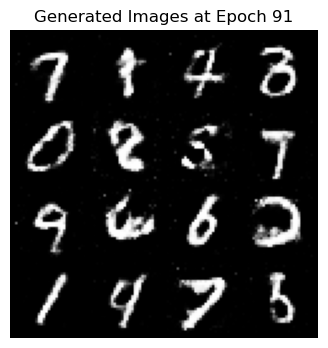

Epoch [92/200]  D Loss: 1.2445  G Loss: 1.0692
Epoch [93/200]  D Loss: 1.1788  G Loss: 1.2514
Epoch [94/200]  D Loss: 1.1704  G Loss: 0.9262
Epoch [95/200]  D Loss: 1.2332  G Loss: 0.9958
Epoch [96/200]  D Loss: 1.1604  G Loss: 1.0066
Epoch [97/200]  D Loss: 1.2475  G Loss: 0.9354
Epoch [98/200]  D Loss: 1.1716  G Loss: 1.0562
Epoch [99/200]  D Loss: 1.2460  G Loss: 1.4122
Epoch [100/200]  D Loss: 1.1359  G Loss: 0.9499
Epoch [101/200]  D Loss: 1.1831  G Loss: 0.9872


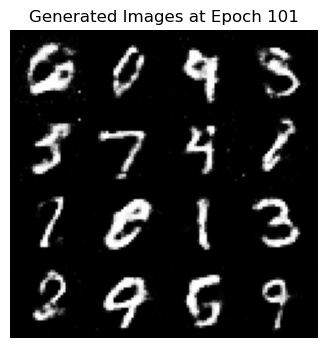

Epoch [102/200]  D Loss: 1.2412  G Loss: 1.0642
Epoch [103/200]  D Loss: 1.1612  G Loss: 0.9475
Epoch [104/200]  D Loss: 1.2067  G Loss: 1.0475
Epoch [105/200]  D Loss: 1.1318  G Loss: 1.0510
Epoch [106/200]  D Loss: 1.1904  G Loss: 1.2257
Epoch [107/200]  D Loss: 1.1766  G Loss: 1.3703
Epoch [108/200]  D Loss: 1.2146  G Loss: 1.0820
Epoch [109/200]  D Loss: 1.1383  G Loss: 0.9719
Epoch [110/200]  D Loss: 1.2171  G Loss: 0.9394
Epoch [111/200]  D Loss: 1.1913  G Loss: 1.0944


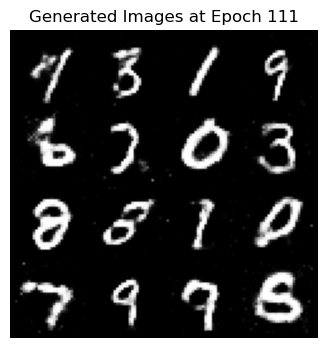

Epoch [112/200]  D Loss: 1.0937  G Loss: 1.1686
Epoch [113/200]  D Loss: 1.2165  G Loss: 1.1162
Epoch [114/200]  D Loss: 1.1634  G Loss: 0.9728
Epoch [115/200]  D Loss: 1.2996  G Loss: 0.9561
Epoch [116/200]  D Loss: 1.1908  G Loss: 1.0687
Epoch [117/200]  D Loss: 1.1606  G Loss: 1.1770
Epoch [118/200]  D Loss: 1.1907  G Loss: 0.8364
Epoch [119/200]  D Loss: 1.0904  G Loss: 1.1123
Epoch [120/200]  D Loss: 1.1263  G Loss: 1.1667
Epoch [121/200]  D Loss: 1.1765  G Loss: 0.9455


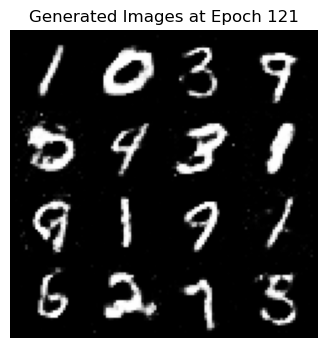

Epoch [122/200]  D Loss: 1.1378  G Loss: 0.9115
Epoch [123/200]  D Loss: 1.2149  G Loss: 1.0355
Epoch [124/200]  D Loss: 1.3127  G Loss: 1.0232
Epoch [125/200]  D Loss: 1.2567  G Loss: 0.9397
Epoch [126/200]  D Loss: 1.1561  G Loss: 1.0034
Epoch [127/200]  D Loss: 1.1685  G Loss: 1.0116
Epoch [128/200]  D Loss: 1.1904  G Loss: 1.3861
Epoch [129/200]  D Loss: 1.1878  G Loss: 1.0669
Epoch [130/200]  D Loss: 1.2377  G Loss: 1.0254
Epoch [131/200]  D Loss: 1.3328  G Loss: 1.1140


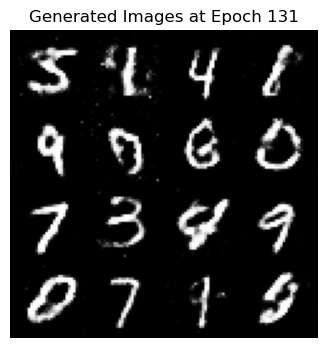

Epoch [132/200]  D Loss: 1.2064  G Loss: 1.1038
Epoch [133/200]  D Loss: 1.2365  G Loss: 1.0185
Epoch [134/200]  D Loss: 1.2628  G Loss: 0.8857
Epoch [135/200]  D Loss: 1.2808  G Loss: 1.0699
Epoch [136/200]  D Loss: 1.2009  G Loss: 0.8990
Epoch [137/200]  D Loss: 1.2129  G Loss: 0.9631
Epoch [138/200]  D Loss: 1.2773  G Loss: 0.9266
Epoch [139/200]  D Loss: 1.2143  G Loss: 1.0375
Epoch [140/200]  D Loss: 1.1558  G Loss: 1.1511
Epoch [141/200]  D Loss: 1.2759  G Loss: 0.9311


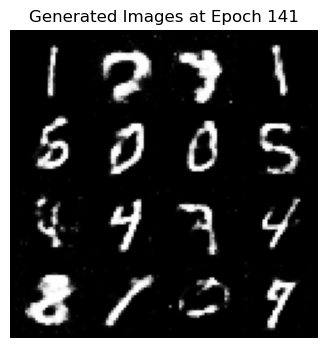

Epoch [142/200]  D Loss: 1.1877  G Loss: 1.0987
Epoch [143/200]  D Loss: 1.2115  G Loss: 1.0847
Epoch [144/200]  D Loss: 1.2092  G Loss: 0.9000
Epoch [145/200]  D Loss: 1.2521  G Loss: 0.9068
Epoch [146/200]  D Loss: 1.1815  G Loss: 0.8888
Epoch [147/200]  D Loss: 1.2770  G Loss: 0.9092
Epoch [148/200]  D Loss: 1.3464  G Loss: 1.0719
Epoch [149/200]  D Loss: 1.1282  G Loss: 0.8878
Epoch [150/200]  D Loss: 1.2777  G Loss: 0.9886
Epoch [151/200]  D Loss: 1.1655  G Loss: 1.0532


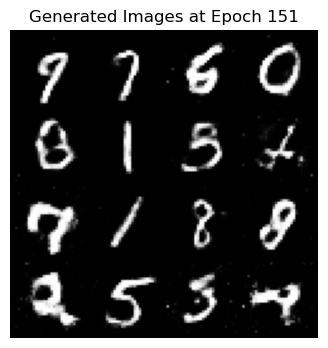

Epoch [152/200]  D Loss: 1.2252  G Loss: 1.0254
Epoch [153/200]  D Loss: 1.3000  G Loss: 0.8339
Epoch [154/200]  D Loss: 1.1749  G Loss: 1.1027
Epoch [155/200]  D Loss: 1.1416  G Loss: 1.1244
Epoch [156/200]  D Loss: 1.2805  G Loss: 0.9774
Epoch [157/200]  D Loss: 1.1038  G Loss: 1.0152
Epoch [158/200]  D Loss: 1.1359  G Loss: 1.1813
Epoch [159/200]  D Loss: 1.2071  G Loss: 1.0555
Epoch [160/200]  D Loss: 1.2150  G Loss: 0.9072
Epoch [161/200]  D Loss: 1.1846  G Loss: 1.1498


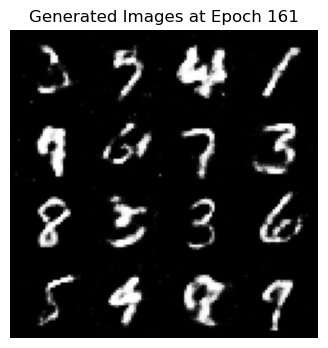

Epoch [162/200]  D Loss: 1.1825  G Loss: 1.0071
Epoch [163/200]  D Loss: 1.1777  G Loss: 1.0437
Epoch [164/200]  D Loss: 1.2025  G Loss: 1.0727
Epoch [165/200]  D Loss: 1.2290  G Loss: 0.9466
Epoch [166/200]  D Loss: 1.2480  G Loss: 1.0421
Epoch [167/200]  D Loss: 1.1404  G Loss: 1.0063
Epoch [168/200]  D Loss: 1.1984  G Loss: 1.0868
Epoch [169/200]  D Loss: 1.3046  G Loss: 1.1008
Epoch [170/200]  D Loss: 1.2368  G Loss: 0.9307
Epoch [171/200]  D Loss: 1.1643  G Loss: 0.9840


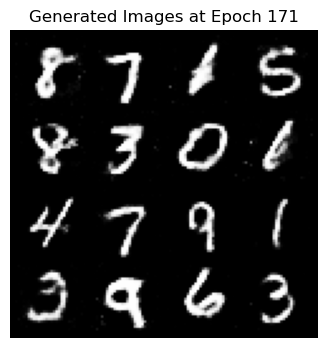

Epoch [172/200]  D Loss: 1.2458  G Loss: 0.9764
Epoch [173/200]  D Loss: 1.2408  G Loss: 1.1484
Epoch [174/200]  D Loss: 1.1080  G Loss: 1.1388
Epoch [175/200]  D Loss: 1.2049  G Loss: 0.9167
Epoch [176/200]  D Loss: 1.2494  G Loss: 0.9933
Epoch [177/200]  D Loss: 1.1668  G Loss: 1.1727
Epoch [178/200]  D Loss: 1.1340  G Loss: 1.0022
Epoch [179/200]  D Loss: 1.2476  G Loss: 0.8854
Epoch [180/200]  D Loss: 1.1755  G Loss: 0.8819
Epoch [181/200]  D Loss: 1.1717  G Loss: 0.9633


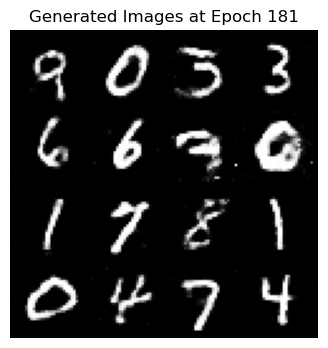

Epoch [182/200]  D Loss: 1.2456  G Loss: 1.0338
Epoch [183/200]  D Loss: 1.2756  G Loss: 1.1197
Epoch [184/200]  D Loss: 1.2239  G Loss: 1.1016
Epoch [185/200]  D Loss: 1.2205  G Loss: 0.9730
Epoch [186/200]  D Loss: 1.1726  G Loss: 1.2128
Epoch [187/200]  D Loss: 1.2140  G Loss: 1.0678
Epoch [188/200]  D Loss: 1.1585  G Loss: 0.9598
Epoch [189/200]  D Loss: 1.2234  G Loss: 1.0519
Epoch [190/200]  D Loss: 1.2095  G Loss: 1.2202
Epoch [191/200]  D Loss: 1.2488  G Loss: 1.1545


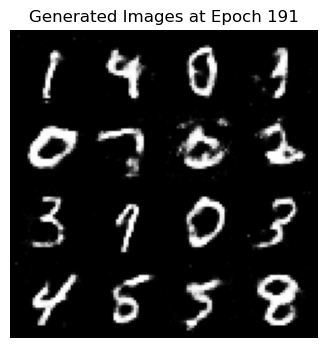

Epoch [192/200]  D Loss: 1.2048  G Loss: 1.0401
Epoch [193/200]  D Loss: 1.2345  G Loss: 0.9102
Epoch [194/200]  D Loss: 1.1992  G Loss: 1.1477
Epoch [195/200]  D Loss: 1.2722  G Loss: 1.0210
Epoch [196/200]  D Loss: 1.2148  G Loss: 1.1207
Epoch [197/200]  D Loss: 1.1913  G Loss: 1.0190
Epoch [198/200]  D Loss: 1.2344  G Loss: 1.0495
Epoch [199/200]  D Loss: 1.2284  G Loss: 0.9849
Epoch [200/200]  D Loss: 1.1785  G Loss: 0.8628


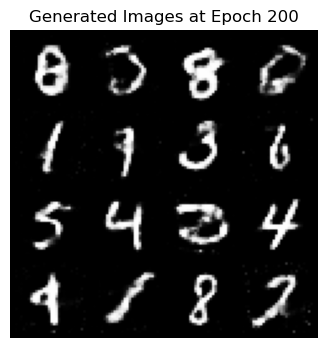

In [7]:
# Training Loop
g_losses = []
d_losses = []

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(dataloader):
        # Flatten the images and move to device
        real_imgs = imgs.view(-1, img_size).to(device)
        batch_size = real_imgs.size(0)

        # Labels for real and fake images with label smoothing
        real_labels = torch.ones(batch_size, 1).uniform_(0.9, 1.0).to(device)  # Label smoothing for real labels
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # Train Discriminator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)

        real_loss = criterion(discriminator(real_imgs), real_labels)
        fake_loss = criterion(discriminator(fake_imgs.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        d_optimizer.zero_grad()
        d_loss.backward()
        d_optimizer.step()

        # Train Generator
        z = torch.randn(batch_size, latent_dim).to(device)
        fake_imgs = generator(z)
        g_loss = criterion(discriminator(fake_imgs), real_labels)

        g_optimizer.zero_grad()
        g_loss.backward()
        g_optimizer.step()

        # Save losses for plotting
        g_losses.append(g_loss.item())
        d_losses.append(d_loss.item())

    # Step the learning rate scheduler
    g_scheduler.step()
    d_scheduler.step()

    # Print progress
    print(f"Epoch [{epoch+1}/{num_epochs}]  D Loss: {d_loss.item():.4f}  G Loss: {g_loss.item():.4f}")

    # Visualize the generated images at certain epochs
    if epoch % 10 == 0 or epoch == num_epochs - 1:
        with torch.no_grad():
            z = torch.randn(16, latent_dim).to(device)
            sample_imgs = generator(z).view(-1, 1, 28, 28)
            grid = torchvision.utils.make_grid(sample_imgs, nrow=4, normalize=True)
            plt.figure(figsize=(4, 4))
            plt.imshow(np.transpose(grid.cpu().numpy(), (1, 2, 0)))
            plt.title(f"Generated Images at Epoch {epoch+1}")
            plt.axis("off")
            plt.show()


In [9]:
# Latent Space Interpolation for MNIST Dataset
z_start = torch.randn(1, latent_dim).to(device)
z_end = torch.randn(1, latent_dim).to(device)

# Generate interpolation steps
num_interpolations = 10
interpolated_images = []

for alpha in np.linspace(0, 1, num_interpolations):
    z = (1 - alpha) * z_start + alpha * z_end
    with torch.no_grad():
        interpolated_image = generator(z).view(1, 1, 28, 28).cpu()
        interpolated_images.append(interpolated_image)


ValueError: Expected more than 1 value per channel when training, got input size torch.Size([1, 512])

In [ ]:
# Plot interpolated images
plt.figure(figsize=(20, 4))
for i, img in enumerate(interpolated_images):
    plt.subplot(1, num_interpolations, i + 1)
    plt.imshow(img.squeeze().numpy(), cmap='gray')
    plt.axis("off")
    plt.title(f"Step {i+1}")
plt.suptitle("Latent Space Interpolation Between Two Images (MNIST)")
plt.show()

In [ ]:
# Plot the loss curves
plt.figure(figsize=(10, 5))
plt.plot(g_losses, label="Generator Loss")
plt.plot(d_losses, label="Discriminator Loss")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.title("Generator and Discriminator Loss During Training")
plt.show()


In [ ]:
# Latent Space Interpolation for MNIST Dataset
z_start = torch.randn(1, latent_dim).to(device)
z_end = torch.randn(1, latent_dim).to(device)

# Generate interpolation steps
num_interpolations = 10
interpolated_images = []

for alpha in np.linspace(0, 1, num_interpolations):
    z = (1 - alpha) * z_start + alpha * z_end
    with torch.no_grad():
        interpolated_image = generator(z).view(1, 1, 28, 28).cpu()
        interpolated_images.append(interpolated_image)

# Plot interpolated images
plt.figure(figsize=(20, 4))
for i, img in enumerate(interpolated_images):
    plt.subplot(1, num_interpolations, i + 1)
    plt.imshow(img.squeeze().numpy(), cmap='gray')
    plt.axis("off")
    plt.title(f"Step {i+1}")
plt.suptitle("Latent Space Interpolation Between Two Images (MNIST)")
plt.show()

The interpolation between two latent vectors demonstrates smooth transitions in the generated images. Each intermediate image gradually morphs from the features of the first image to those of the second. This smoothness indicates that the generator has learned a coherent and continuous latent space, where linear interpolations produce realistic and consistent transformations.